# CS166 - Pre-Class 12.2

In [13]:
import scipy
from matplotlib import pyplot as plt
import time
import numpy as np

plt.style.use('ggplot')

In [1]:
# Basic model


class IsingSimulation:

    J = 6.34369e-21  # Interaction constant for iron [Joule]
    kB = 1.38065e-23  # Boltzmann constant [Joule / Kelvin]

    def __init__(self, size, temperature=300):
        '''
        Create a new Ising model simulation. The state is initialized
        randomly.

        Arguments:

            size (int) The number of cells along each dimension of the
              square grid.

            temperature (float) The temperature in Kelvin at which to
              run the simulation. The Curie temperature for iron is
              1043 K. Room temperature is about 300 K. Default: 300.
        '''
        self.size = size
        self.temperature = temperature
        self.state = scipy.random.choice(
            [-1, +1], size=(self.size, self.size))
        self.step = 0

    def set_temperature(self, temp):
        '''
        Set the temperature of the model in Kelvin.
        '''
        self.temperature = float(temp)

    def energy(self):
        '''
        Compute the energy of the current state of the model.
        '''
        return -self.J * (self.state * (
            scipy.roll(self.state, 1, axis=0) +
            scipy.roll(self.state, 1, axis=1))).sum()

    def average_magnetism(self):
        '''
        Compute the average per-cell magnetism of the current state
        of the model.
        '''
        return self.state.mean()

    def update(self):
        '''
        Do a single cell update of the model state.
        '''
        # Pick a random cell to flip
        i, j = scipy.random.randint(self.size, size=2)

        # Change in energy from current state to next state
        delta_E = 2 * self.J * self.state[i,j] * (
            self.state[(i + 1) % self.size, j] +
            self.state[(i - 1) % self.size, j] +
            self.state[i, (j + 1) % self.size] +
            self.state[i, (j - 1) % self.size])

        # Log probability of changing state
        log_p = -delta_E / (self.temperature * self.kB)
        if scipy.log(scipy.random.uniform(0, 1)) < log_p:
            self.state[i,j] = -self.state[i,j]

        self.step += 1

    def display(self):
        '''
        Plot the state of the model.
        '''
        plt.figure()
        plt.imshow(self.state, vmin=-1, vmax=+1)
        plt.title('Step: ' + str(self.step) + ', M = ' + str(self.average_magnetism()))

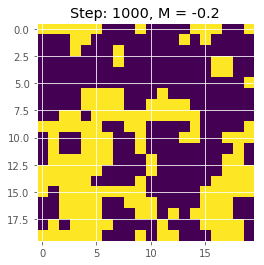

In [35]:
# Test that the basic model works
size = 20
sim = IsingSimulation(size, temperature=1043)  # Ising model at the Curie temperature
for _ in range(1000):
    sim.update()
sim.display()


## Task 1

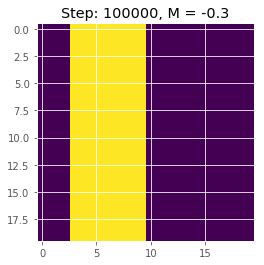

In [37]:
size = 20
sim = IsingSimulation(size, temperature=1)  # Ising model at the Curie temperature
for _ in range(100000):
    sim.update()
sim.display()


In [18]:
%%time
ave_mag = []
times = [2]
n_trials = 100

exp_start_time = time.time()
for i in range(n_trials):
    trial_start_time = time.time()
    size = 20
    sim = IsingSimulation(size, temperature=1)  # Ising model at close to 0 Kelvin
    for _ in range(100000):
        sim.update()
    # sim.display()
    ave_mag.append(sim.average_magnetism())
    print("\rFinished {i}/{n_trials}. Time: {t:.2f} sec. ETA: {ETA:.2f} sec.".format(i=i+1, 
                                    n_trials=n_trials, t=time.time()-exp_start_time,
                                    ETA=((np.mean(times)*n_trials)-(time.time()-exp_start_time))), end="")
    times.append(time.time()-trial_start_time)
print("\n")

Finished 99. Time: 203.51 sec. ETA: -0.02 sec.

CPU times: user 3min 18s, sys: 4.41 s, total: 3min 23s
Wall time: 3min 23s


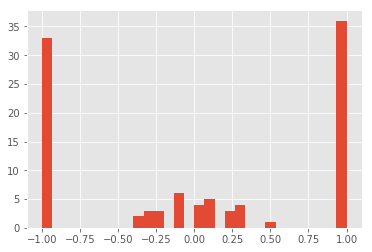

In [23]:
plt.hist(ave_mag, bins=30)
plt.show()

As expected (pretty much) we see most of the density split between -1 and +1.

If we would set the temperature to zero we would get into truble. The probability is defined as:
$$f(x) = \frac{e^{-E_x/k_BT}}{Z}$$
which means that when $T$ is set to 0, the probability would be 0 (it would actually not be defined, but we'll assume now that it approaches 0). That would make the math messy, so we would prefer to set the temperature as close to zero. It also makes sense in the terms of the physics, as theoretically the absolute zero cannot be reached.

## Task 2

CPU times: user 17.1 s, sys: 160 ms, total: 17.3 s
Wall time: 17.2 s


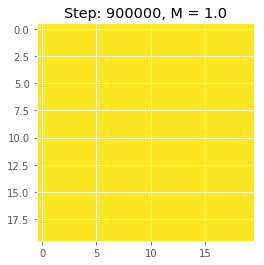

In [38]:
%%time
size = 20
initial_temp = 2000
reduce_temp_every = 400

sim = IsingSimulation(size, temperature=initial_temp)  # Ising model at close to 0 Kelvin
for t in range(reduce_temp_every*initial_temp + 100000):
    sim.update()
    if (t % reduce_temp_every == 0) and (sim.temperature > 1):
        sim.temperature -= 1
sim.display()

In [40]:
%%time
ave_mag = []
times = [20]
n_trials = 50

initial_temp = 2000
reduce_temp_every = 400

exp_start_time = time.time()
for i in range(n_trials):
    trial_start_time = time.time()
    size = 20
    sim = IsingSimulation(size, temperature=initial_temp) 
    for t in range(reduce_temp_every*initial_temp + 100000):
        sim.update()
        if (t % reduce_temp_every == 0) and (sim.temperature > 1):
            sim.temperature -= 1
    ave_mag.append(sim.average_magnetism())
    print("\rFinished {i}/{n_trials}. Time: {t:.2f} sec. ETA: {ETA:.2f} sec.".format(i=i+1, 
                                    n_trials=n_trials, t=time.time()-exp_start_time,
                                    ETA=((np.mean(times)*n_trials)-(time.time()-exp_start_time))), end="")
    times.append(time.time()-trial_start_time)
print("\n")

Finished 50/50. Time: 873.84 sec. ETA: 0.42 sec.

CPU times: user 14min 23s, sys: 9.39 s, total: 14min 33s
Wall time: 14min 33s


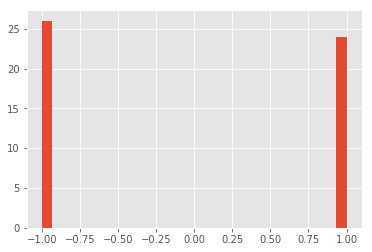

In [41]:
plt.hist(ave_mag, bins=30)
plt.show()